In [1]:
# Note : Install Seaborn via terminal using conda install seaborn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn
 

# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

In [2]:
# import some data to play with
iris = datasets.load_iris()

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# this are actual target (Y values).
# in unsupervised we don't have Y, we are keeping our actual target values to check for accuracy of clustering.
# in unsupervised, you cannot determine accuracy since Y are not there, 
# unless business team provides you with few example of real X and Y.
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# These are three flowers or Y actual. We will not be using them in our model as its unsuperised.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
x = pd.DataFrame(iris.data)

In [8]:
x.head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# We will only use X to fit our model. 
# In un-supervised we don't have Y given but we need to determine the Y(class)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# Actual target values
y = pd.DataFrame(iris.target)
# Giving Y actual a column name
y.columns = ['Targets']
# printing 5 values of y
y.head(5)

,Targets
0,0
1,0
2,0
3,0
4,0


In [12]:

# The kmeans algorithm is implemented in the scikits-learn library
from sklearn.cluster import KMeans
 
for k in range (1, 11):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x.iloc[:, :])

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia)
        

k: 1  cost: 680.8244
k: 2  cost: 152.36870647733906
k: 3  cost: 78.94084142614602
k: 4  cost: 57.345409315718165
k: 5  cost: 46.53558205128205
k: 6  cost: 38.95701115711985
k: 7  cost: 34.32652991452992
k: 8  cost: 30.227724598930486
k: 9  cost: 27.766706937799047
k: 10  cost: 26.07225182334006


In [13]:
# We select the Value of K for which cost reduced suddenly.
# Here k=3 ( 3 clusters) we select k=3  as it fell from 152 to 78, then it did not decrease much,say 57.


In [14]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# Cluster lables as outcome of model
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [16]:
# create a dataframe of model cluster numbers
model_labels_df = pd.DataFrame(model.labels_)
model_labels_df.columns = ["Cluster"]
model_labels_df.head(3)

,Cluster
0,1
1,1
2,1


In [17]:
# We join actual data and model output(cluster number)
iris = pd.concat([x,model_labels_df],axis =1)

In [18]:
iris.head(3)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [19]:
# We have created cluster,now we will plot it and Diagnoise it

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")


# Subset the iris dataset by species
setosa = iris[iris['Cluster'] == 0]
virginica = iris[iris['Cluster'] == 2]
vesicolor = iris[iris['Cluster'] == 1]




D:\miniconda\envs\ml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(2.8,7.9,'vesicolor')

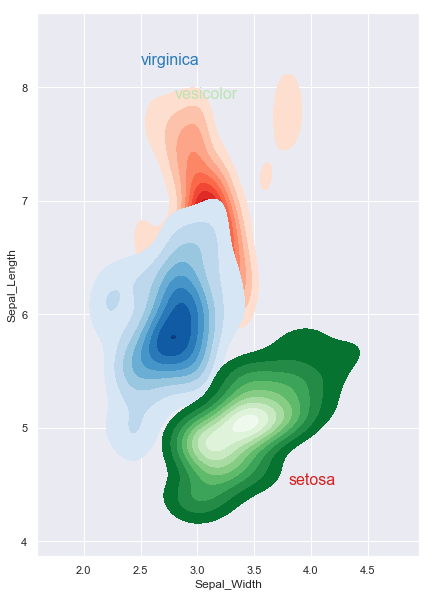

In [21]:
# Set up the figure
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# Draw the two density plots
ax1 = sns.kdeplot(setosa.Sepal_Width, setosa.Sepal_Length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax2 = sns.kdeplot(virginica.Sepal_Width, virginica.Sepal_Length,
                 cmap="Blues", shade=True, shade_lowest=False)
ax3 = sns.kdeplot(vesicolor.Sepal_Width, vesicolor.Sepal_Length,
                 cmap="Greens_r", shade=True, shade_lowest=False)

# Add labels to the plot
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
Greens_r = sns.color_palette("Greens_r")[-2]
ax1.text(2.5, 8.2, "virginica", size=16, color=blue)
ax2.text(3.8, 4.5, "setosa", size=16, color=red)
ax3.text(2.8, 7.9, "vesicolor", size=16, color=Greens_r)

In [210]:
iris.to_csv("iris_clustered.csv")